In [2]:
options(warn=-1)
library(dplyr)
library(ggplot2)

# Step1. Data Exploration

In [3]:
loan=read.csv(file = '/home/ren/Loan/loan.csv') 

In [5]:
dim(loan)

[1] 887379     74

In [7]:
loan %>% group_by(loan_status) %>% summarise(Total=n()) %>% arrange(desc(Total))

,loan_status,Total
1,Current,601779
2,Fully Paid,207723
3,Charged Off,45248
4,Late (31-120 days),11591
5,Issued,8460
6,In Grace Period,6253
7,Late (16-30 days),2357
8,Does not meet the credit policy. Status:Fully Paid,1988
9,Default,1219
10,Does not meet the credit policy. Status:Charged Off,761


In [4]:
loan=loan[loan$loan_status !='Current',]

In [5]:
dim(loan)

[1] 285600     74

# Map of missing values

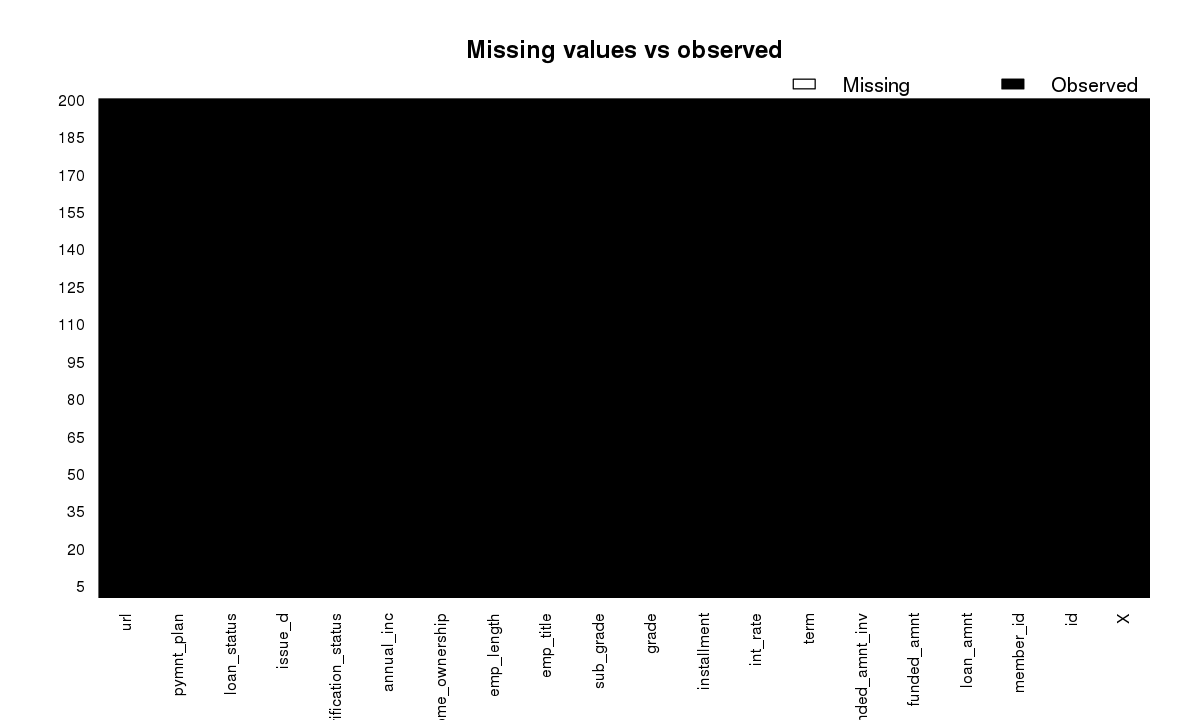

In [16]:
options(warn=-1)
options(repr.plot.width = 10, repr.plot.height = 6)
library(Amelia)
missmap(loan[sample(nrow(loan),200),c(1:20)], main = "Missing values vs observed", col = c('white','black'))

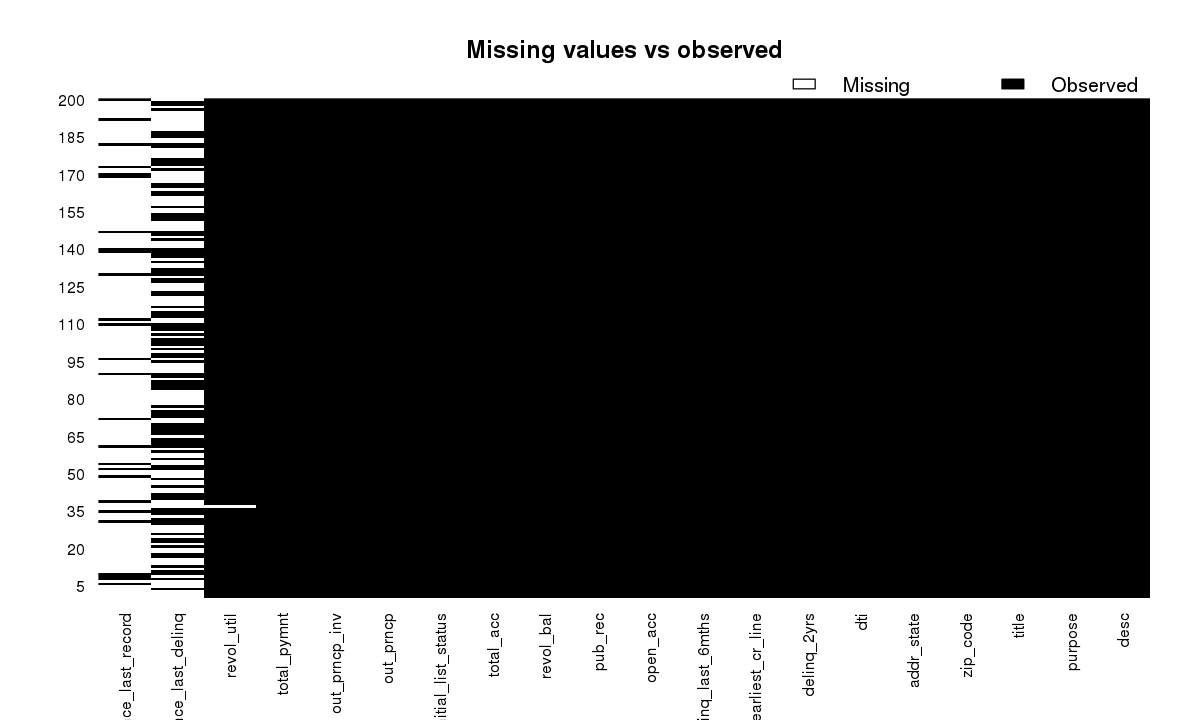

In [17]:
options(repr.plot.width = 10, repr.plot.height = 6)
missmap(loan[sample(nrow(loan),200),c(21:40)], main = "Missing values vs observed", col = c('white','black'))

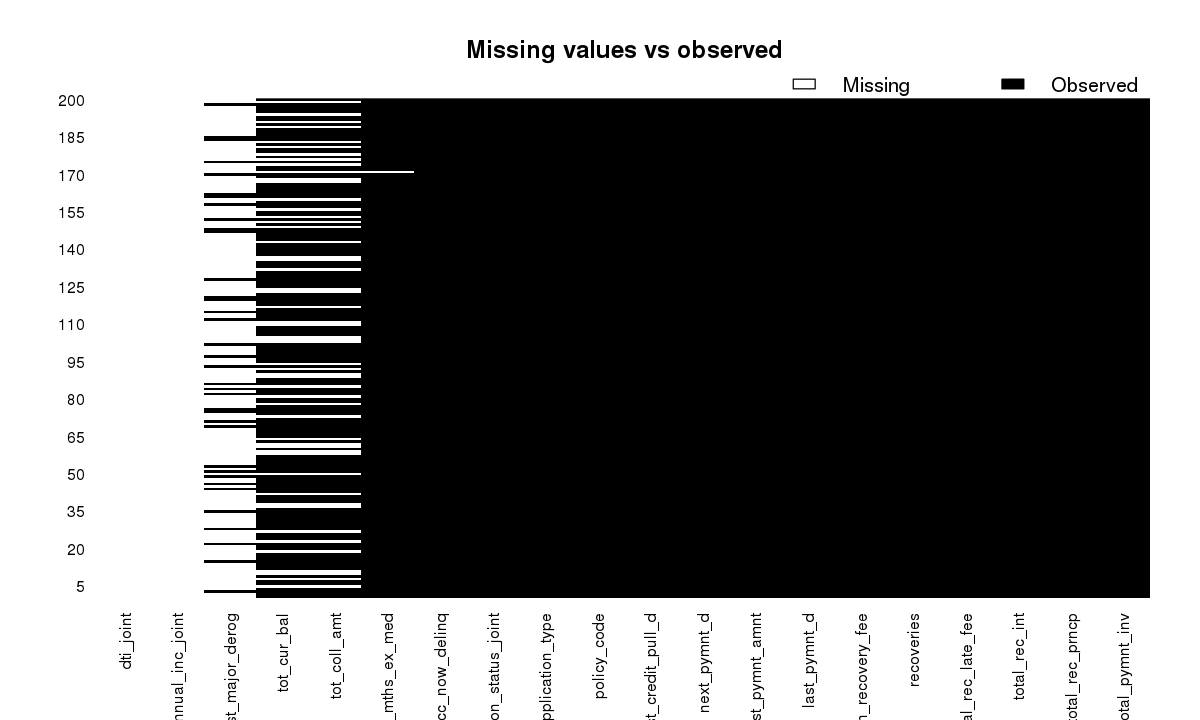

In [19]:
options(repr.plot.width = 10, repr.plot.height = 6)
missmap(loan[sample(nrow(loan),200),c(41:60)], main = "Missing values vs observed", col = c('white','black'))

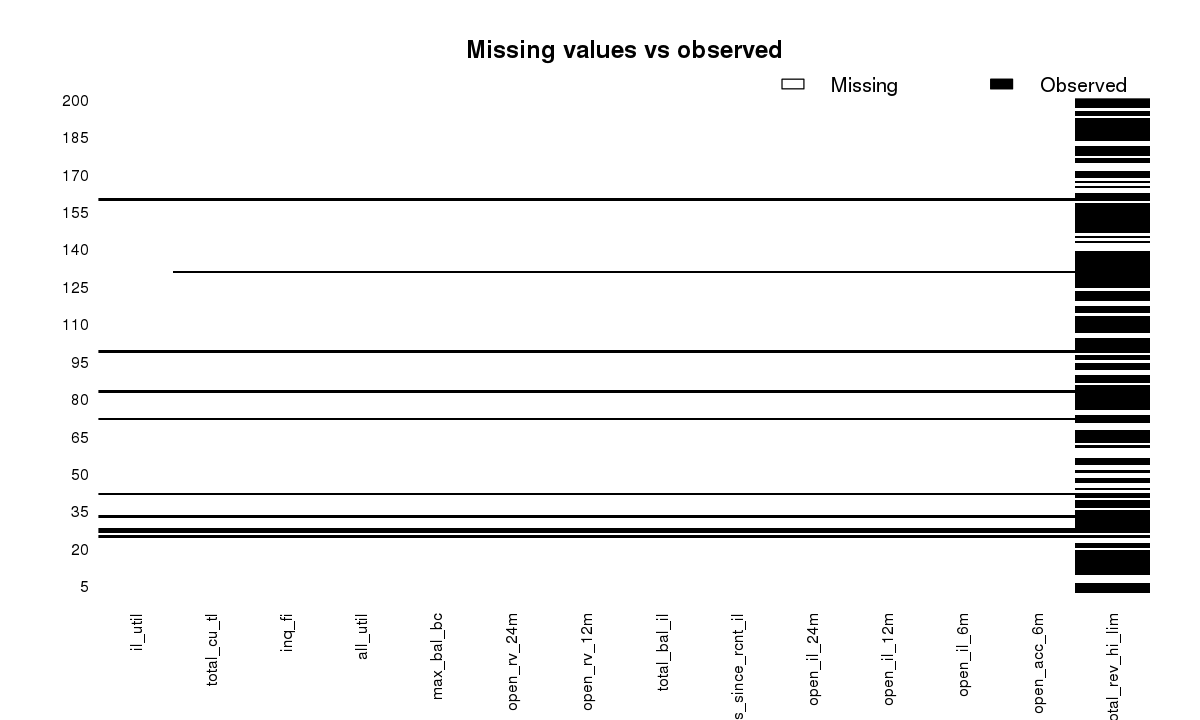

In [20]:
options(repr.plot.width = 10, repr.plot.height = 6)
missmap(loan[sample(nrow(loan),200),c(61:74)], main = "Missing values vs observed", col = c('white','black'))

# Divide and Conquer

seperate categorical and numerical data

First, let's look at the target value. Defaulted loans or loans that are late are maked as 1.


In [4]:
ll=loan %>% select(loan_status) %>% group_by(loan_status) %>% summarise(Total=n()) %>% arrange(desc(Total))
loan=loan %>% mutate(target=(!loan_status %in% ll$loan_status[c(1,4,7)]))

In [7]:
head(loan[,c('loan_status', 'target')])

,loan_status,target
1,Fully Paid,FALSE
2,Charged Off,TRUE
3,Fully Paid,FALSE
4,Fully Paid,FALSE
5,Fully Paid,FALSE
6,Fully Paid,FALSE


In [4]:
nums <- sapply(loan, is.numeric)
ndf=loan[ , nums]
cdf=loan[ , !nums]
cat('totl number of columns',dim(loan)[2],'\n')
cat('totl number of numeric columns',dim(ndf)[2],'\n')
cat('totl number of categorical columns',dim(cdf))

totl number of columns 75 
totl number of numeric columns 52 
totl number of categorical columns 285600 23

In [9]:
substrRight <- function(x, n){
  substr(x, nchar(x)-n+1, nchar(x))
}

In [10]:
ddf=cdf[,substrRight(colnames(cdf),1)=='d']
cat('total number of date columns', dim(ddf)[2])

total number of date columns 4

# Date related features

In [3]:
loan=read.csv(file='/home/ren/Loan/l3.csv')
options(jupyter.plot_mimetypes = "image/png") 

In [8]:
loan=loan %>% mutate(issue_mo=substr(issue_d,1,3))
loan=loan %>% mutate(issue_year=substr(issue_d,5,8))

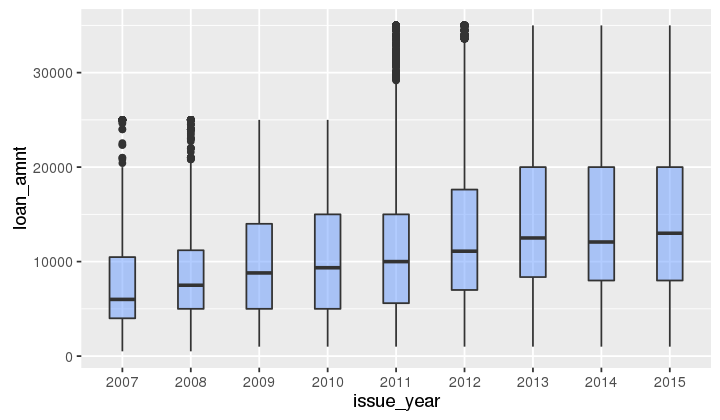

In [64]:
options(repr.plot.width = 6, repr.plot.height = 3.5)
ggplot(loan, aes(issue_year, loan_amnt))+geom_boxplot(fill="#6699ff",alpha=0.5, width=0.5)+theme_gray()

In [6]:
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}


In [27]:
options(jupyter.plot_mimetypes = "image/png") 


In [4]:
g1=loan %>% group_by(issue_year) %>% summarise(amount=mean(target))
p1=ggplot(g1,aes(issue_year, amount))+geom_bar(stat="identity", fill="#6699ff", width=.5, alpha=0.5)+coord_flip()+ggtitle('Loan by year')
g2=loan %>% group_by(issue_mo) %>% summarise(amount=mean(target))
p2=ggplot(g2,aes(issue_mo, amount))+geom_bar(stat="identity", fill="#6699ff", width=.5, alpha=0.5)+coord_flip()+ggtitle('Loan by month')

# Percentage of default on each category. Loans from December are less likely to default

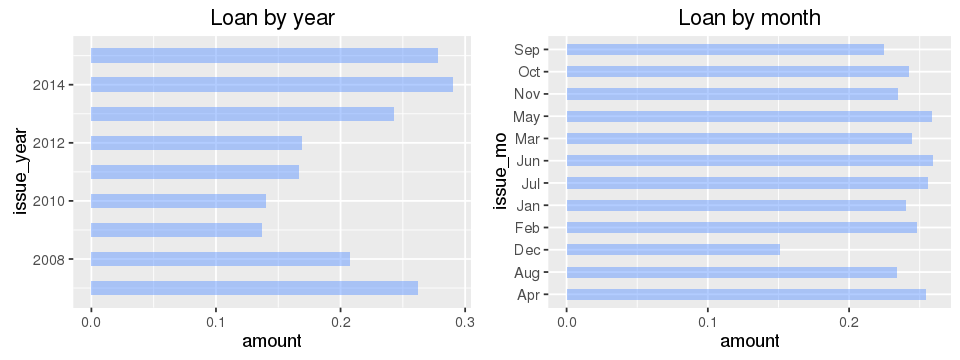

In [7]:
options(repr.plot.width = 8, repr.plot.height = 3)
multiplot(p1,p2, cols = 2)

# Location features

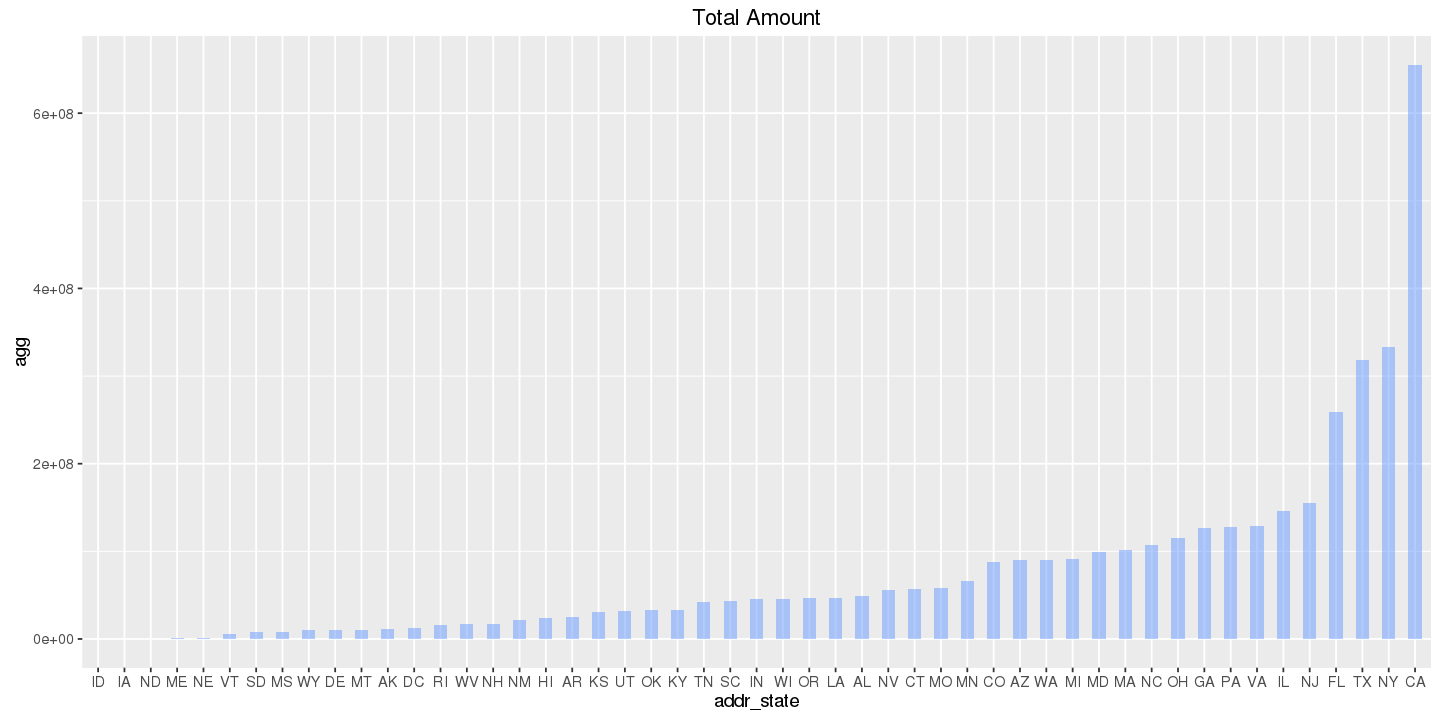

In [116]:
options(repr.plot.width = 12, repr.plot.height = 6)
g4=loan %>% group_by(addr_state) %>% summarise(agg=sum(loan_amnt)) %>% arrange(desc(agg))
g4$addr_state=factor(g4$addr_state, levels = g4$addr_state[order(g4$agg)])
ggplot(g4,aes(addr_state, agg))+geom_bar(stat="identity", fill="#6699ff", width=.5, alpha=0.5)+ggtitle('Total Amount')

# Which states are more likely to default

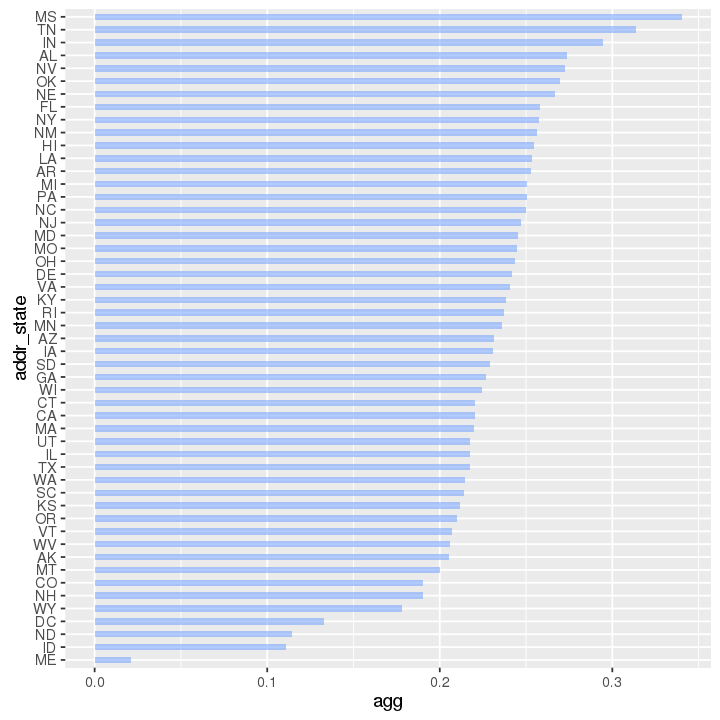

In [46]:
options(repr.plot.width = 6, repr.plot.height = 6)
g3=loan %>% group_by(addr_state) %>% summarise(agg=mean(target)) %>% arrange(desc(agg))
g3$addr_state=factor(g3$addr_state, levels = g3$addr_state[order(g3$agg)])

ggplot(g3,aes(addr_state, agg))+geom_bar(stat="identity", fill="#6699ff", width=.5, alpha=0.5)+coord_flip()

# Take a look at the rest of the categories

In [77]:
summary(cdf[,c(1:4)])

         term        grade       sub_grade                 emp_title     
  36 months:218277   A:44880   B3     : 19471                   : 16025  
  60 months: 67323   B:82800   B4     : 18502   Teacher         :  2431  
                     C:74685   C1     : 16822   Manager         :  2378  
                     D:47558   C2     : 16198   Supervisor      :  1054  
                     E:23644   B5     : 15886   Registered Nurse:  1032  
                     F: 9457   B2     : 15846   RN              :  1017  
                     G: 2576   (Other):182875   (Other)         :261663  

In [78]:
summary(cdf[,c(5:8)])

     emp_length     home_ownership        verification_status     issue_d      
 10+ years:86735   ANY     :     1   Not Verified   : 95350   Oct-2014: 10148  
 2 years  :26531   MORTGAGE:139793   Source Verified: 85853   Jul-2014:  9605  
 < 1 year :23983   NONE    :    48   Verified       :104397   Dec-2015:  9072  
 3 years  :23118   OTHER   :   179                            Apr-2014:  7357  
 5 years  :20028   OWN     : 25429                            Dec-2013:  7055  
 1 year   :19191   RENT    :120150                            May-2014:  7052  
 (Other)  :86014                                              (Other) :235311  

In [80]:
summary(cdf[,c(9:10,12)])

             loan_status     pymnt_plan
 Fully Paid        :207723   n:285593  
 Charged Off       : 45248   y:     7  
 Late (31-120 days): 11591             
 Issued            :  8460             
 In Grace Period   :  6253             
 Late (16-30 days) :  2357             
 (Other)           :  3968             
                                                    desc       
                                                      :192938  
                                                      :   231  
 Debt Consolidation                                   :    13  
 Camping Membership                                   :     8  
   Borrower added on 03/10/14 > Debt consolidation<br>:     6  
   Borrower added on 01/03/14 > Debt consolidation<br>:     5  
 (Other)                                              : 92399  

In [82]:
summary(cdf[,c(13:15)])

               purpose                           title           zip_code     
 debt_consolidation:167976   Debt consolidation     : 88667   945xx  :  3607  
 credit_card       : 56347   Credit card refinancing: 28092   112xx  :  3230  
 home_improvement  : 16849   Debt Consolidation     : 11398   750xx  :  3086  
 other             : 16287   Home improvement       :  8259   100xx  :  2792  
 major_purchase    :  6969   Other                  :  7457   900xx  :  2752  
 small_business    :  5357   Consolidation          :  3691   606xx  :  2724  
 (Other)           : 15815   (Other)                :138036   (Other):267409  

In [ ]:
cl2=c('term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose')

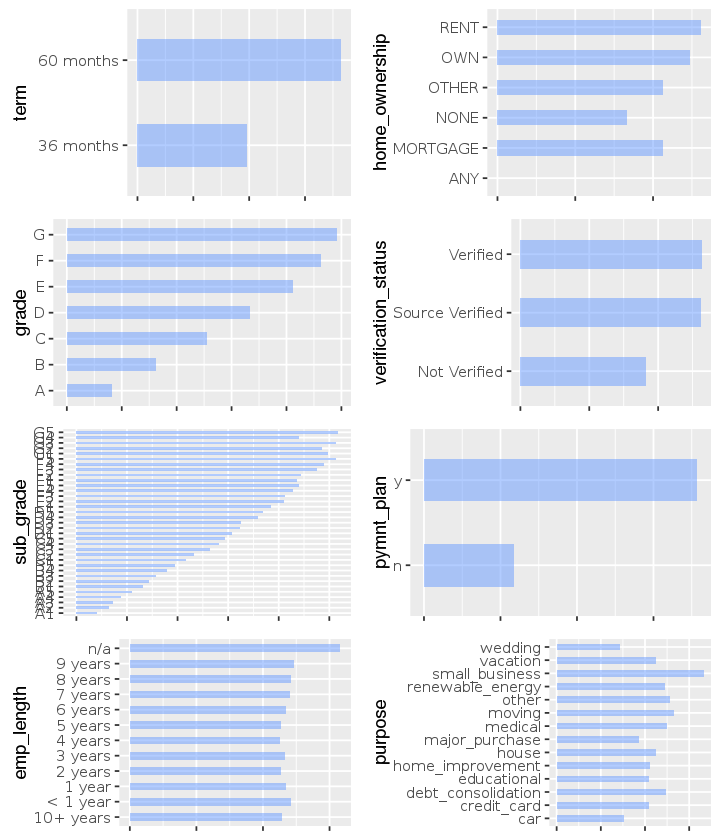

In [111]:
options(repr.plot.width = 6, repr.plot.height = 7)
plots=list()
for (i in 1:length(cl2)){
    v=cl2[i]
    g1=loan %>% group_by_(cl2[i]) %>% summarise(amount=mean(target))
    plots[[i]]=ggplot(g1,aes_string(cl2[i], colnames(g1)[2]))+geom_bar(stat="identity", fill="#6699ff", width=.5, alpha=0.5)+coord_flip()+theme(axis.title.x=element_blank(),
axis.text.x=element_blank(),axis.text.y=element_text(v))
    
}

multiplot(plotlist=plots,cols=2)

In [121]:
#Pyment_plan looks good on graph, but actually it's very imbalanced, so not very useful
summary(loan[,'pymnt_plan'])

n      y 
285593      7

We can already see strong relations between some features: grade, sub_grade, term, purpose. Columns to use: term, sub_grade, purpose, home_ownership

# Numerical features

------------------------------------------------------------------------------ 
Loan amount distribution

    length         n       NAs    unique        0s      mean    meanSE
     3e+05     3e+05         0     1e+03         0  1.37e+04  1.54e+01

       .05       .10       .25    median       .75       .90       .95
  3.00e+03  4.80e+03  7.50e+03  1.20e+04  1.90e+04  2.50e+04  3.00e+04

     range        sd     vcoef       mad       IQR      skew      kurt
  3.45e+04  8.21e+03  5.98e-01  8.08e+03  1.15e+04  8.15e-01  4.49e-02
 
lowest : 5e+02 (1e+01), 6e+02, 6e+02 (6e+00), 7e+02 (3e+00), 7e+02
highest: 3e+04 (5e+00), 3e+04, 3e+04, 3e+04 (2e+01), 4e+04 (1e+04)


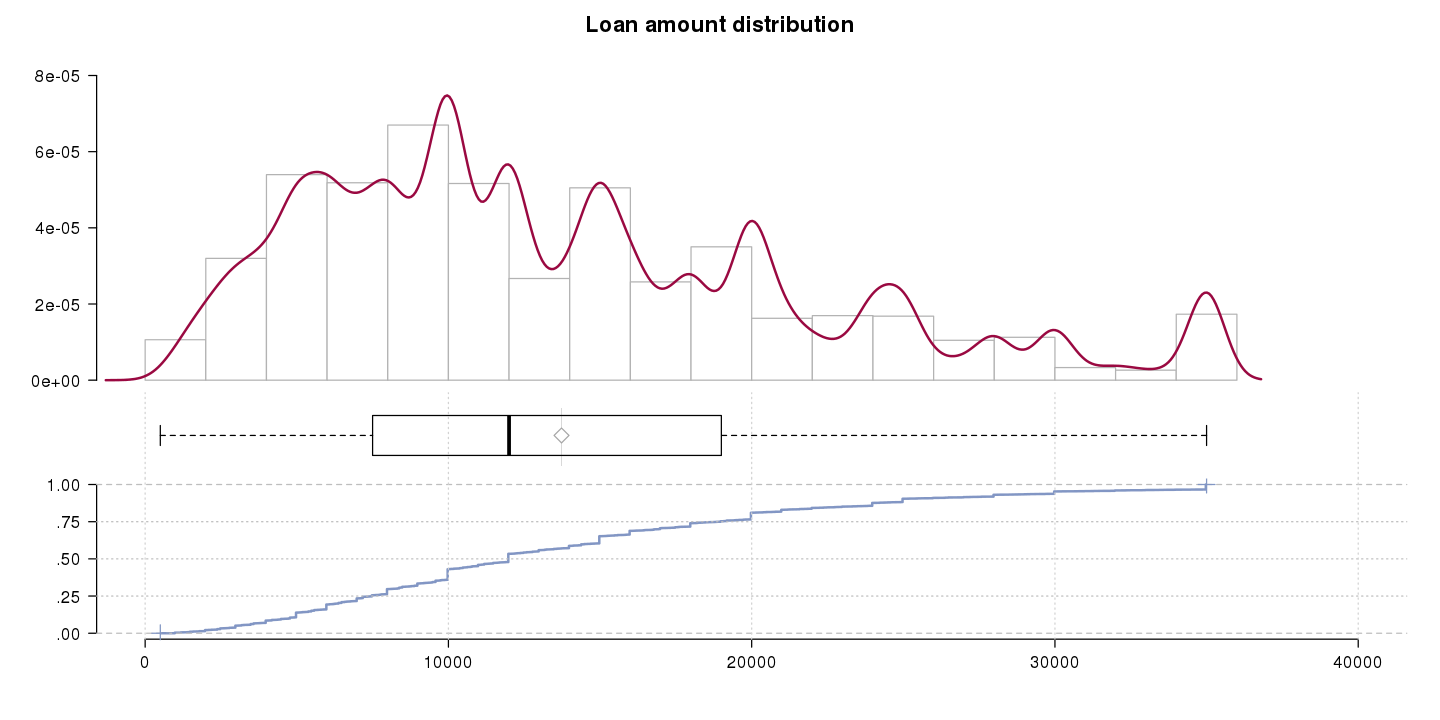

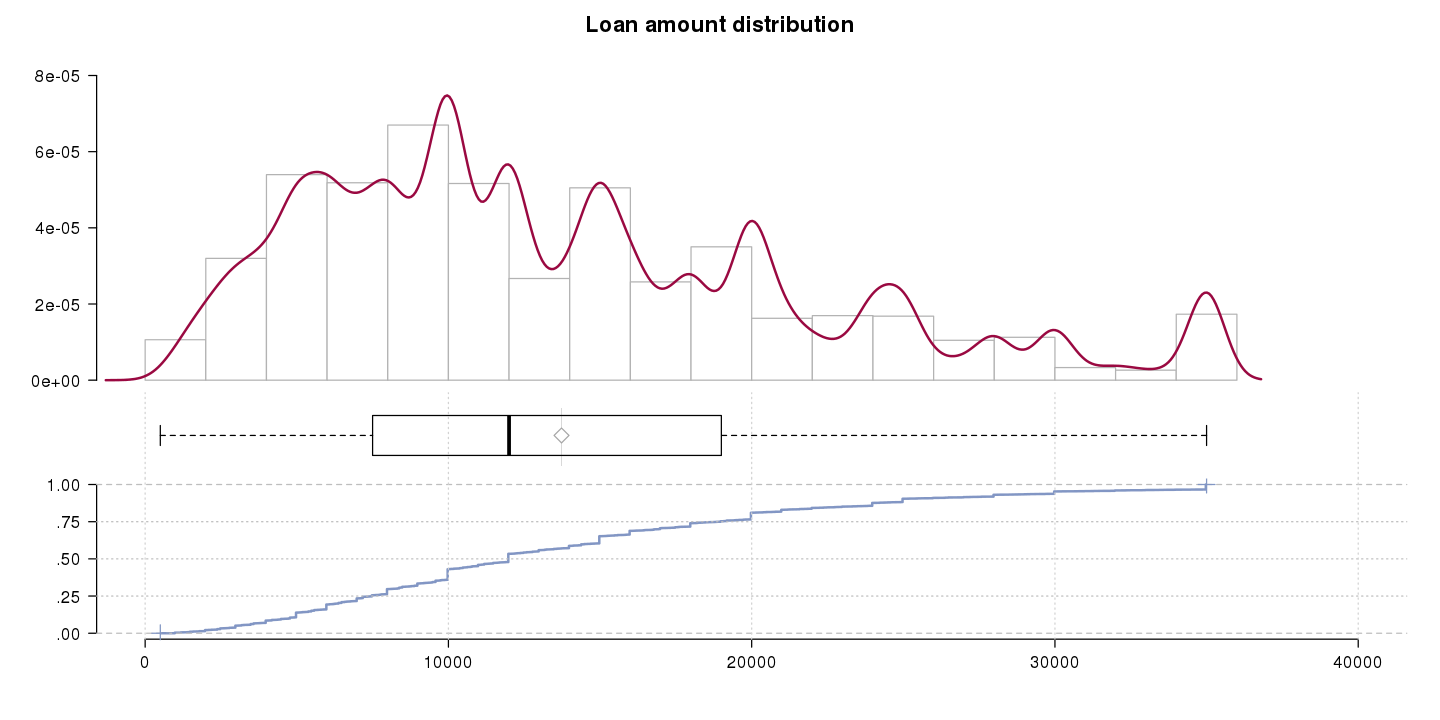

In [130]:
library(readxl)
library(DescTools)
Desc(loan$loan_amnt, main = "Loan amount distribution", plotit = T)

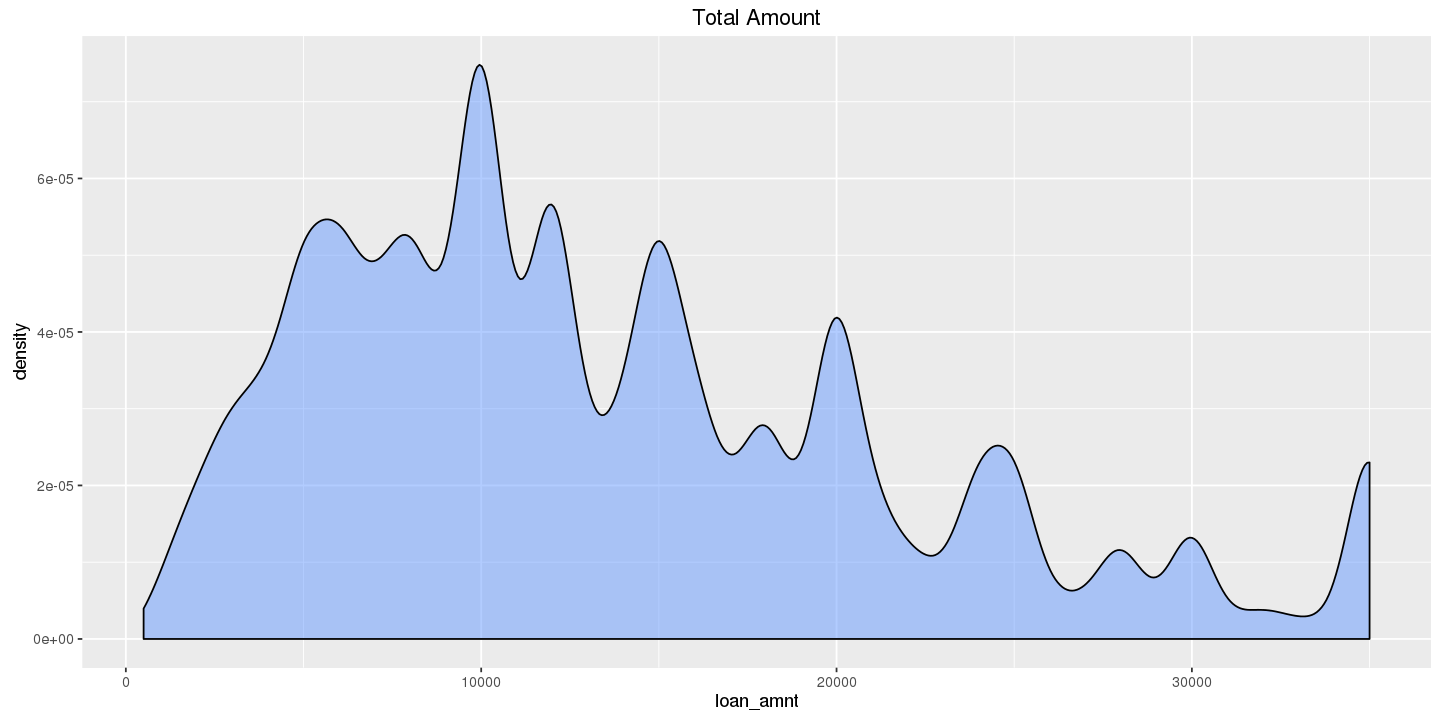

In [129]:
options(repr.plot.width = 12, repr.plot.height = 6)

ggplot(loan,aes(loan_amnt))+geom_density(fill="#6699ff", alpha=0.5)+ggtitle('Total Amount')

# High correlation between loan_amnt and payment etc

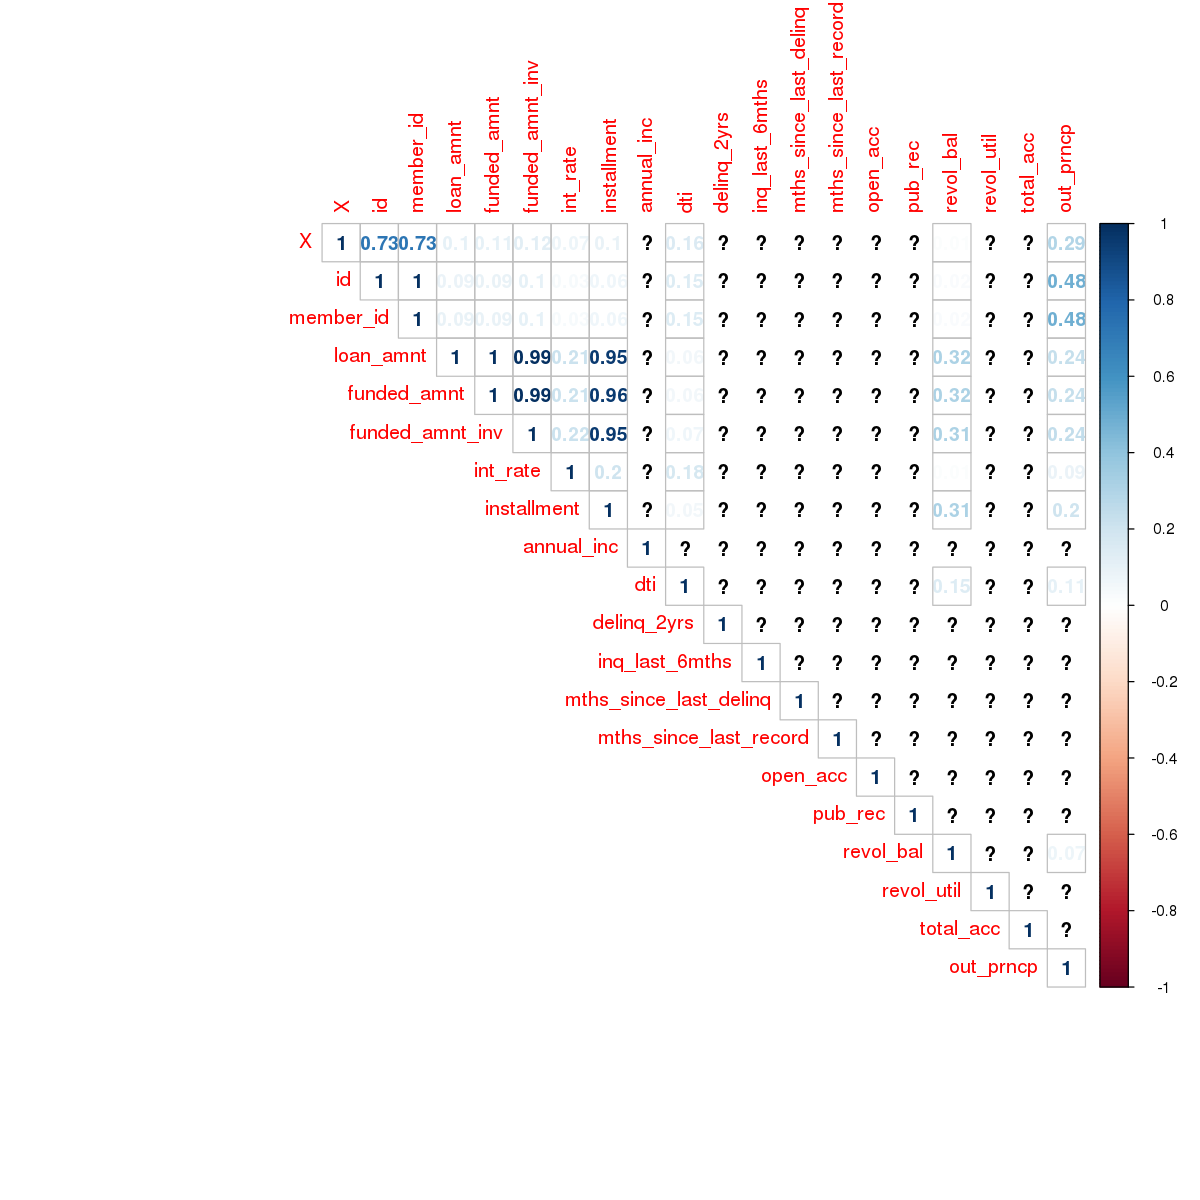

In [142]:
options(repr.plot.width = 10, repr.plot.height = 10)
library(corrplot)
corrplot(cor(ndf[,c(1:20)]), type="upper", method='number')

In [143]:
cor(ndf)

,X,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
X,1.00000000,0.72615980,0.72820295,0.10243416,0.10922049,0.12480970,0.07267747,0.09601131,NA,0.15807486,NA,NA,NA,NA,NA,NA,0.01280463,NA,NA,0.29348013,0.29348596,-0.09557779,-0.08127503,-0.05550742,-0.19869661,-0.02595255,-0.03931542,-0.01551963,0.14935115,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
id,0.72615980,1.00000000,0.99909884,0.08846535,0.09239344,0.10223632,0.03007856,0.06165488,NA,0.14840383,NA,NA,NA,NA,NA,NA,0.02231133,NA,NA,0.48170635,0.48170971,-0.20363615,-0.19449976,-0.15095570,-0.29906574,-0.02850515,-0.06677314,-0.03216957,0.11123238,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
member_id,0.72820295,0.99909884,1.00000000,0.09036419,0.09439517,0.10455069,0.03220054,0.06357646,NA,0.14888872,NA,NA,NA,NA,NA,NA,0.02233586,NA,NA,0.48114244,0.48114601,-0.20225695,-0.19283837,-0.14965734,-0.29830926,-0.02885678,-0.06580922,-0.03146523,0.11433432,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
loan_amnt,0.10243416,0.08846535,0.09036419,1.00000000,0.99782103,0.99097129,0.21241806,0.95419318,NA,0.05736180,NA,NA,NA,NA,NA,NA,0.31993427,NA,NA,0.23648928,0.23648302,0.74653948,0.74431622,0.68289558,0.61014836,0.06031181,0.15926933,0.11227335,0.50958383,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
funded_amnt,0.10922049,0.09239344,0.09439517,0.99782103,1.00000000,0.99365268,0.21397792,0.95743180,NA,0.05921980,NA,NA,NA,NA,NA,NA,0.31910418,NA,NA,0.23833457,0.23832838,0.74710596,0.74532549,0.68386465,0.60884787,0.06020587,0.15930081,0.11242686,0.51166292,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
funded_amnt_inv,0.12480970,0.10223632,0.10455069,0.99097129,0.99365268,1.00000000,0.21626817,0.95048520,NA,0.06501961,NA,NA,NA,NA,NA,NA,0.31285546,NA,NA,0.24078360,0.24077977,0.74140422,0.74985749,0.67903865,0.60303234,0.05466104,0.15695818,0.10857777,0.51378491,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
int_rate,0.072677466,0.030078559,0.032200544,0.212418062,0.213977921,0.216268167,1.000000000,0.203175357,NA,0.175627933,NA,NA,NA,NA,NA,NA,0.012378184,NA,NA,0.089061006,0.089032016,0.108115442,0.110988893,0.007370212,0.406070768,0.064533400,0.160368157,0.104865962,0.093176847,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
installment,0.09601131,0.06165488,0.06357646,0.95419318,0.95743180,0.95048520,0.20317536,1.00000000,NA,0.05499595,NA,NA,NA,NA,NA,NA,0.31126781,NA,NA,0.20131623,0.20131361,0.73685101,0.73450674,0.68199775,0.57490943,0.06733327,0.14417685,0.10383578,0.46304978,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
annual_inc,NA,NA,NA,NA,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
dti,0.158074858,0.148403825,0.148888718,0.057361805,0.059219798,0.065019613,0.175627933,0.054995948,NA,1.000000000,NA,NA,NA,NA,NA,NA,0.146298653,NA,NA,0.106381114,0.106362841,-0.033503911,-0.028163737,-0.052671644,0.045102096,0.001000330,0.037725177,0.031059010,-0.008651437,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [9]:
cn2=c('loan_amnt', 'int_rate', 'total_acc', 'annual_inc', 'dti', 'revol_util', 'revol_bal')

# Feature distribution default vs not default

In [12]:
remove_outliers <- function(x, na.rm = TRUE, ...) {
  qnt <- quantile(x, probs=c(.25, .75), na.rm = na.rm, ...)
  H <- 1.5 * IQR(x, na.rm = na.rm)
  y <- x
  y[x < (qnt[1] - H)] <- NA
  y[x > (qnt[2] + H)] <- NA
  y
}

In [17]:
reject_outliers  <- function(data, m=3){
    
    data = data[!apply(sapply(data, function(x) abs(scale(x)) >= 2), 1, any), ]
    
    
}

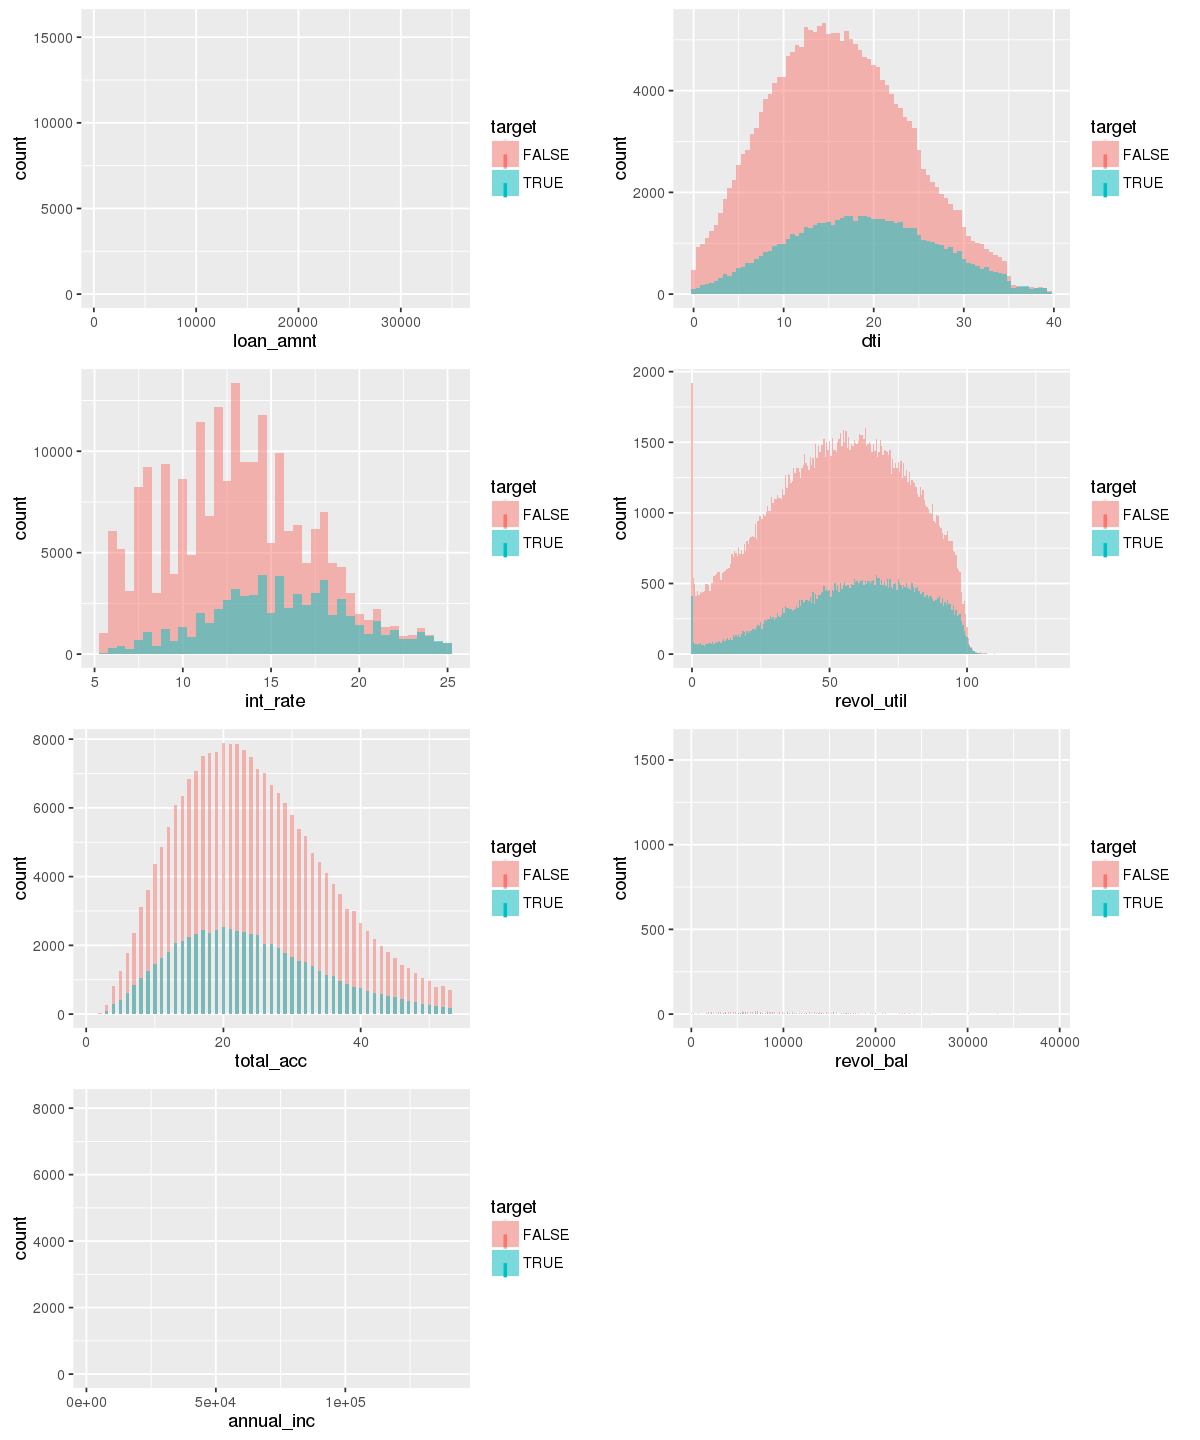

In [19]:
#library(plyr)
options(repr.plot.width = 10, repr.plot.height = 12)
plots=list()
for (i in 1:length(cn2)){
#for (i in 1:4){
    loan[,cn2[i]] = remove_outliers(loan[,cn2[i]])
    #cdat <- ddply(loan, "target", summarise, rating.mean=mean(cn2[i]))
    plots[[i]]=ggplot(loan, aes_string(cn2[i], fill='target')) +
    geom_histogram(binwidth=.5, alpha=.5, position="identity") +
    
    #geom_vline(data=cdat, aes(xintercept=rating.mean,  colour=target),
    #           linetype="dashed", size=1)
    
    
}

multiplot(plotlist=plots,cols=2)





In [5]:
col_use=c('addr_state', 'issue_mo','issue_year', 'term', 'sub_grade', 'purpose', 'home_ownership','loan_amnt', 'int_rate', 'total_acc', 'annual_inc', 'dti', 'revol_util', 'revol_bal','il_util','open_rv_12m','all_util','target'
)

In [6]:
loan_use=loan[,col_use]

In [7]:
for(i in 1:ncol(loan_use)){
  loan_use[is.na(loan_use[,i]), i] <- mean(loan_use[,i], na.rm = TRUE)
}

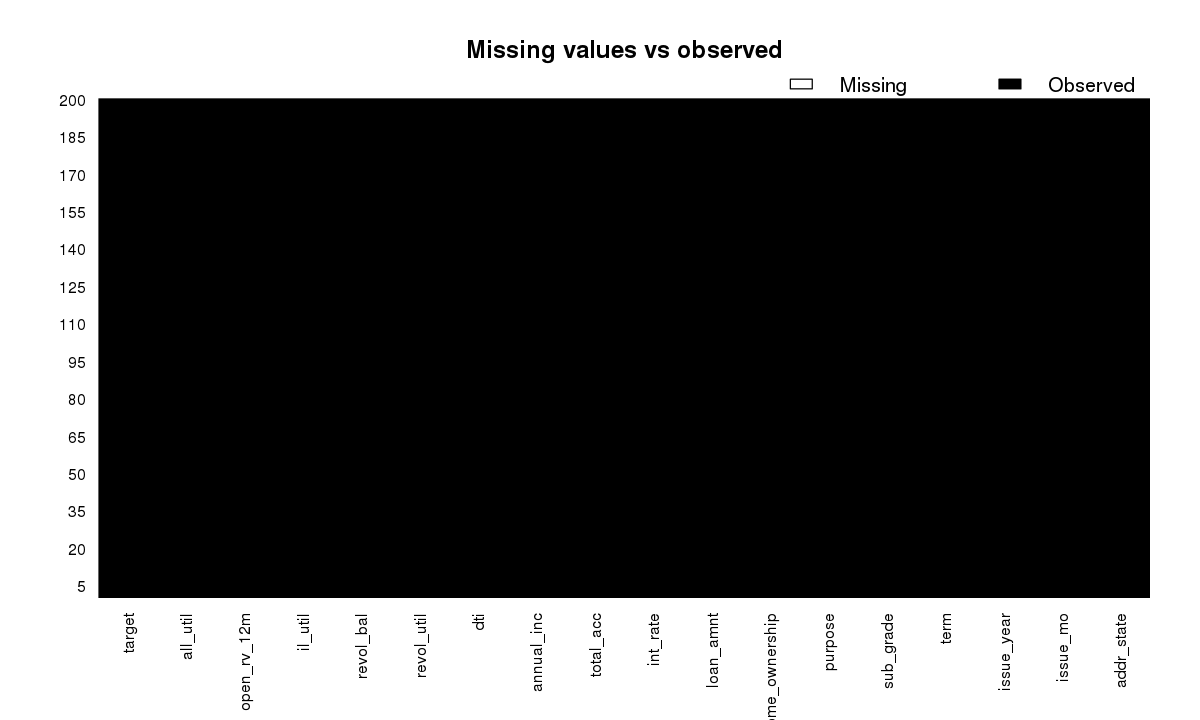

In [9]:
options(warn=-1)
options(repr.plot.width = 10, repr.plot.height = 6)
library(Amelia)
missmap(loan_use[sample(nrow(loan_use),200),c(1:18)], main = "Missing values vs observed", col = c('white','black'))

# Step 2 Prepare for the model training

In [10]:
ToDummy=c('issue_mo','issue_year','addr_state','purpose','home_ownership','term')

In [11]:
#do some mapping for categorical features
loan_use[,'sub_grade']=(as.numeric(loan_use[,'sub_grade']))

In [12]:
for (i in 1:6){
    
    tf=factor(loan_use[,ToDummy[i]])
    dummies = model.matrix(~tf)
    loan_use=cbind(loan_use,(dummies[,c(2:dim(dummies)[2])]))
    
    
}



In [13]:
dim(loan_use)

[1] 285600    106

In [14]:
loan_use=loan_use[ , -which(names(loan_use) %in% c('addr_state','issue_mo','issue_year','term','purpose','home_ownership'))]

In [15]:
dim(loan_use)

[1] 285600    100

In [16]:
range01 <- function(x){(x-min(x))/(max(x)-min(x))}

In [17]:
for (i in 1:dim(loan_use)[2]){
    loan_use[,i]=range01(loan_use[,i])
    
}

In [32]:
names(loan_use)[100]='terms'
names(loan_use)

[1] "sub_grade"            "loan_amnt"            "int_rate"            
  [4] "total_acc"            "annual_inc"           "dti"                 
  [7] "revol_util"           "revol_bal"            "il_util"             
 [10] "open_rv_12m"          "all_util"             "target"              
 [13] "tfAug"                "tfDec"                "tfFeb"               
 [16] "tfJan"                "tfJul"                "tfJun"               
 [19] "tfMar"                "tfMay"                "tfNov"               
 [22] "tfOct"                "tfSep"                "tf2008"              
 [25] "tf2009"               "tf2010"               "tf2011"              
 [28] "tf2012"               "tf2013"               "tf2014"              
 [31] "tf2015"               "tfAL"                 "tfAR"                
 [34] "tfAZ"                 "tfCA"                 "tfCO"                
 [37] "tfCT"                 "tfDC"                 "tfDE"                
 [40] "tfFL"                 "tfGA"                 "tfHI"                
 [43] "tfIA"                 "tfID"                 "tfIL"                
 [46] "tfIN"                 "tfKS"                 "tfKY"                
 [49] "tfLA"                 "tfMA"                 "tfMD"                
 [52] "tfME"                 "tfMI"                 "tfMN"                
 [55] "tfMO"                 "tfMS"                 "tfMT"                
 [58] "tfNC"                 "tfND"                 "tfNE"                
 [61] "tfNH"                 "tfNJ"                 "tfNM"                
 [64] "tfNV"                 "tfNY"                 "tfOH"                
 [67] "tfOK"                 "tfOR"                 "tfPA"                
 [70] "tfRI"                 "tfSC"                 "tfSD"                
 [73] "tfTN"                 "tfTX"                 "tfUT"                
 [76] "tfVA"                 "tfVT"                 "tfWA"                
 [79] "tfWI"                 "tfWV"                 "tfWY"                
 [82] "tfcredit_card"        "tfdebt_consolidation" "tfeducational"       
 [85] "tfhome_improvement"   "tfhouse"              "tfmajor_purchase"    
 [88] "tfmedical"            "tfmoving"             "tfother"             
 [91] "tfrenewable_energy"   "tfsmall_business"     "tfvacation"          
 [94] "tfwedding"            "tfMORTGAGE"           "tfNONE"              
 [97] "tfOTHER"              "tfOWN"                "tfRENT"              
[100] "terms"

In [3]:
#loan_use=read.csv(file='/home/ren/Loan/l_use.csv')

In [33]:
train_df=loan_use[1:214200,]

In [34]:
test_df=loan_use[214201:285600,]

# Step3 Start training

In [24]:
model <- glm(target ~.,family=binomial(link='logit'),data=train)

# Summary for logistic regression

In [10]:
summary(model)


Call:
glm(formula = target ~ ., family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8978  -0.7186  -0.5376  -0.3294   2.7940  

Coefficients: (5 not defined because of singularities)
                                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)                        -11.131940  72.463043  -0.154 0.877908    
sub_grade                            1.057952   0.081100  13.045  < 2e-16 ***
loan_amnt                            0.549771   0.031001  17.734  < 2e-16 ***
int_rate                             0.981858   0.074928  13.104  < 2e-16 ***
total_acc                           -0.317015   0.031975  -9.914  < 2e-16 ***
annual_inc                          -1.274760   0.038133 -33.429  < 2e-16 ***
dti                                  0.997850   0.031839  31.341  < 2e-16 ***
revol_util                           0.569425   0.036089  15.778  < 2e-16 ***
revol_bal                           -0.14

# ROC curve

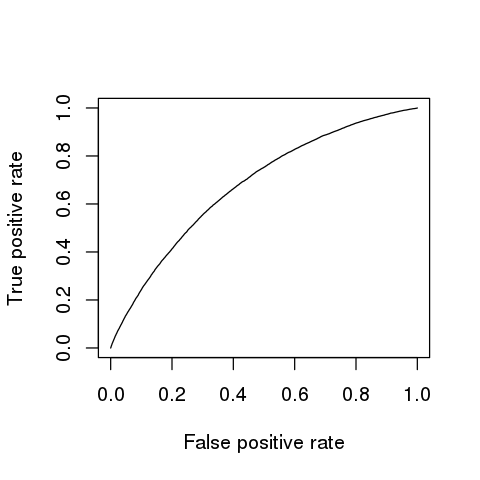

In [27]:
options(repr.plot.width = 4, repr.plot.height = 4)
library(ROCR)
p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$target)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

In [14]:
auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc

[1] 0.6773922

# Randome Forest

In [38]:
library(randomForest)
fit <- randomForest(target ~., weights=wArray, data=train_df, maxnodes = 100, ntree = 10 )
print(fit) # view results



Call:
 randomForest(formula = target ~ ., data = train_df, weights = wArray,      maxnodes = 100, ntree = 10) 
               Type of random forest: regression
                     Number of trees: 10
No. of variables tried at each split: 33

          Mean of squared residuals: 0.1571423
                    % Var explained: 9.38


In [61]:
#top 10 most important features 

imp=data.frame(importance(fit))
imp$cat=rownames(imp)
#head(imp)
#imp=as.numeric(imp)
head(imp[order(-imp[1]),],10)

,IncNodePurity,cat
int_rate,1235.978,int_rate
sub_grade,851.4677,sub_grade
terms,488.365,terms
dti,246.8323,dti
annual_inc,218.3046,annual_inc
tf2014,173.4693,tf2014
tf2012,66.94967,tf2012
revol_util,48.98891,revol_util
loan_amnt,44.35896,loan_amnt
tf2013,40.0052,tf2013


# Random forest ROC curve

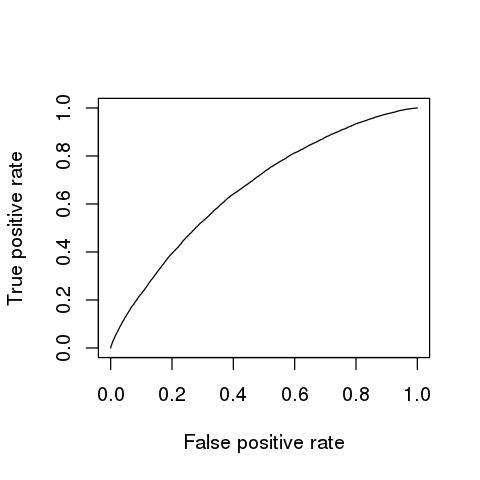

In [37]:
options(repr.plot.width = 4, repr.plot.height = 4)
library(ROCR)
p <- predict(fit, newdata=test_df, type="response")
pr <- prediction(p, test_df$target)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

In [22]:
library(caret)
library(randomForest)

In [23]:
weight=1/(sum(train_df$target)/length(train_df$target))
cat('Weight we use: ', weight)

Weight we use:  4.479672

In [43]:
length(train_df$target)

[1] 214200

In [24]:
wArray=c()
for (i in 1:length(train_df$target)){
#for (i in 1:214200){
    if (train_df$target[i] == 1){
        wArray[i]=weight
    }else{
        wArray[i]=1
    }
   
}
head(wArray)

[1] 1.000000 4.479672 1.000000 1.000000 1.000000 1.000000

In [ ]:
# Convert Survived to Factor
train_df$target <- factor(train_df$target)
# Set a random seed (so you will get the same results as me)
set.seed(42)
# Train the model using a "random forest" algorithm
model <- train(target ~ .,
               
               weights = wArray,
               data = train_df, # Use the trainSet dataframe as the training data
               method = "rf",# Use the "random forest" algorithm
               #trControl = trainControl(method = "cv", # Use cross-validation
               #                                    number = 5) # Use 5 folds for cross-validation
)